# Final Project : - Building two Recommendation Systems

## Data Preperation

In [24]:
pip install pandas numpy scikit-learn matplotlib seaborn torch requests tweepy vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 6.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

In [25]:
import pandas as pd

# Load u.data and u.item datasets
u_data = pd.read_csv('/Users/salmanmohamm3d/Desktop/Social M A/Final Project/u.data.csv', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
u_item = pd.read_csv('/Users/salmanmohamm3d/Desktop/Social M A/Final Project/u.item', sep='|', names=['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], encoding='latin-1')


In [26]:
u_data.head(10)

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [27]:
u_item.head(20)

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Dropping the NAN value column

In [29]:
u_item = u_item.drop('video_release_date', axis=1)

In [30]:
u_item.head(10)

,movie_id,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Building Collaborative Filtering-Based Recommender

### Matrix Factorization

In [32]:
# Create a user-item rating matrix
num_users = u_data.user_id.unique().shape[0]
num_items = u_data.item_id.unique().shape[0]
R = np.zeros((num_users, num_items))

for row in u_data.itertuples():
    R[row.user_id - 1, row.item_id - 1] = row.rating

print(f"User-Item Matrix: \n{R}")

User-Item Matrix: 
[[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]


In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score
from math import sqrt

class MatrixFactorization:
    def __init__(self, R, K, alpha, beta, iterations):
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

    def train(self):
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))

        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])

        self.samples = [
            (i, j, self.R[i, j])
            for i in range(self.num_users)
            for j in range(self.num_items)
            if self.R[i, j] > 0
        ]

        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            rmse = self.rmse()
            training_process.append((i, rmse))
            print("Iteration: %d ; error = %.4f" % (i+1, rmse))

        return training_process

    def sgd(self):
        for i, j, r in self.samples:
            prediction = self.get_rating(i, j)
            e = (r - prediction)

            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])

            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

    def get_rating(self, i, j):
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    def rmse(self):
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return sqrt(error/len(xs))

    def mae(self):
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += abs(self.R[x, y] - predicted[x, y])
        return error/len(xs)

    def precision_recall_f1(self, threshold=3.5):
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()

        y_true = []
        y_pred = []
        
        for x, y in zip(xs, ys):
            y_true.append(self.R[x, y] >= threshold)
            y_pred.append(predicted[x, y] >= threshold)
        
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        
        return precision, recall, f1

    def full_matrix(self):
        return self.b + self.b_u[:,np.newaxis] + self.b_i[np.newaxis:,] + self.P.dot(self.Q.T)

# Instantiate and train the model
mf = MatrixFactorization(R, K=20, alpha=0.001, beta=0.01, iterations=100)
training_process = mf.train()


Iteration: 1 ; error = 1.0676
Iteration: 2 ; error = 1.0342
Iteration: 3 ; error = 1.0128
Iteration: 4 ; error = 0.9979
Iteration: 5 ; error = 0.9870
Iteration: 6 ; error = 0.9786
Iteration: 7 ; error = 0.9719
Iteration: 8 ; error = 0.9664
Iteration: 9 ; error = 0.9618
Iteration: 10 ; error = 0.9579
Iteration: 11 ; error = 0.9546
Iteration: 12 ; error = 0.9516
Iteration: 13 ; error = 0.9490
Iteration: 14 ; error = 0.9466
Iteration: 15 ; error = 0.9445
Iteration: 16 ; error = 0.9426
Iteration: 17 ; error = 0.9409
Iteration: 18 ; error = 0.9392
Iteration: 19 ; error = 0.9378
Iteration: 20 ; error = 0.9364
Iteration: 21 ; error = 0.9351
Iteration: 22 ; error = 0.9339
Iteration: 23 ; error = 0.9328
Iteration: 24 ; error = 0.9318
Iteration: 25 ; error = 0.9308
Iteration: 26 ; error = 0.9299
Iteration: 27 ; error = 0.9290
Iteration: 28 ; error = 0.9282
Iteration: 29 ; error = 0.9274
Iteration: 30 ; error = 0.9266
Iteration: 31 ; error = 0.9259
Iteration: 32 ; error = 0.9252
Iteration: 33 ; e

In [37]:
# Evaluate the model
rmse = mf.rmse()
mae = mf.mae()
precision, recall, f1 = mf.precision_recall_f1()

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


RMSE: 0.8640
MAE: 0.6826
Precision: 0.7696
Recall: 0.7730
F1-Score: 0.7713


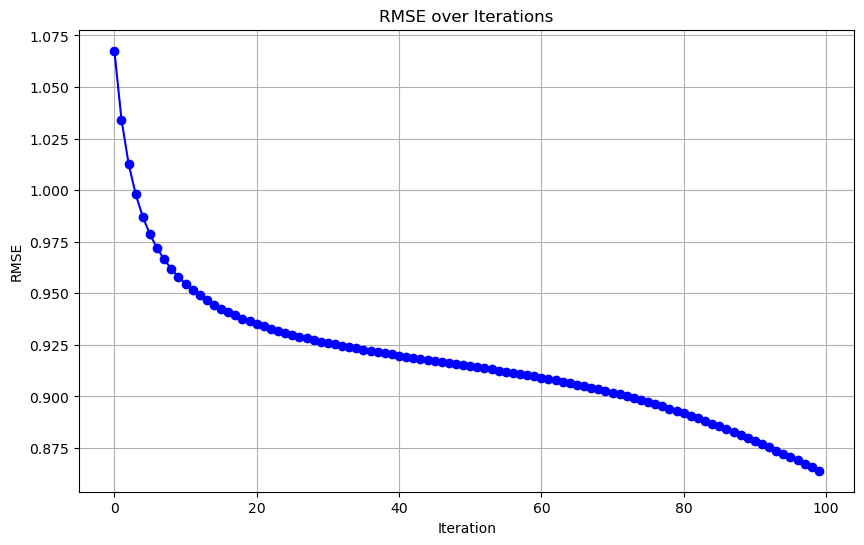

In [38]:
import matplotlib.pyplot as plt

# Extract iteration numbers and RMSE values
iterations = [x[0] for x in training_process]
errors = [x[1] for x in training_process]

# Plot RMSE over iterations
plt.figure(figsize=(10, 6))
plt.plot(iterations, errors, marker='o', linestyle='-', color='b')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('RMSE over Iterations')
plt.grid(True)
plt.show()
